<a href="https://colab.research.google.com/github/lidijasimoliunaite/Lada-ElectionMachine/blob/master/%E2%80%9EUntitled1_ipynb%E2%80%9C_kopija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Authorization and Search tweets
consumer_key = 'l8fGHR2Jl30kZaX8vRDnLKEOZ'
consumer_key_secret = 'K6GI25CgLmlBG5hAvIHRWSU2ZhZA3aPtNfPDBZJe6OIBxj2Pad'
access_token = '1320623735913750529-I1bHtKHPpHoQSURBc60ZEeS34jWqHL'
access_token_secret = 'JZHAaNe1K2H56fnDDn0eHUf3e9n65hCvgNzwdvZVMXJwB'
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
#Defining Search keyword and number of tweets and searching tweets
query = 'globalwarming'
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]

In [ ]:
tweet_dataset.shape

(1000, 5)

In [ ]:
tweet_dataset.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1343166575768178689,RT : Amazing video for the classroom Modest st...,0,1,Sun Dec 27 12:07:21 +0000 2020
1,1343166440598224897,RT : 15 #China Container Ships pollute the equ...,0,19,Sun Dec 27 12:06:48 +0000 2020
2,1343165884517527554,"RT : Warmth will be back next week, to kicksta...",0,4,Sun Dec 27 12:04:36 +0000 2020
3,1343164907571830786,Amazing video for the classroom Modest steps t...,4,1,Sun Dec 27 12:00:43 +0000 2020
4,1343164761538756609,There is a sense of optimism about what the ac...,0,0,Sun Dec 27 12:00:08 +0000 2020


In [ ]:
#Cleaning Data
#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
     
    return input_txt 

tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

tweet_dataset.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1343166575768178689,RT : Amazing video for the classroom Modest st...,0,1,Sun Dec 27 12:07:21 +0000 2020
1,1343166440598224897,RT : 15 #China Container Ships pollute the equ...,0,19,Sun Dec 27 12:06:48 +0000 2020
2,1343165884517527554,"RT : Warmth will be back next week, to kicksta...",0,4,Sun Dec 27 12:04:36 +0000 2020
3,1343164907571830786,Amazing video for the classroom Modest steps t...,4,1,Sun Dec 27 12:00:43 +0000 2020
4,1343164761538756609,There is a sense of optimism about what the ac...,0,0,Sun Dec 27 12:00:08 +0000 2020


Total Positive =  319
Total Negative =  198
Total Neutral =  483


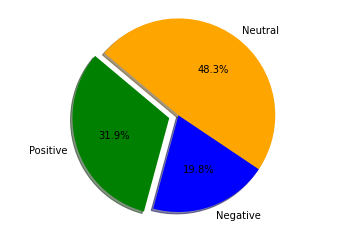

In [ ]:
#Sentiment Analysis Report
#(positive, negative and neutral)
pos = 0
neg = 0
neu = 0
for tweet in searched_tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0:
       pos = pos +1
    elif analysis.sentiment[0]<0:
       neg = neg + 1
    else:
       neu = neu + 1
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

#Plotting sentiments
labels = 'Positive', 'Negative', 'Neutral'
sizes = [319, 198, 483]
colors = ['green', 'blue', 'orange']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
#Creating Dataframe of Tweets
#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)

    
with open('tweet_json_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

        
my_demo_list = []
with open('tweet_json_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])

 #Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data.csv')

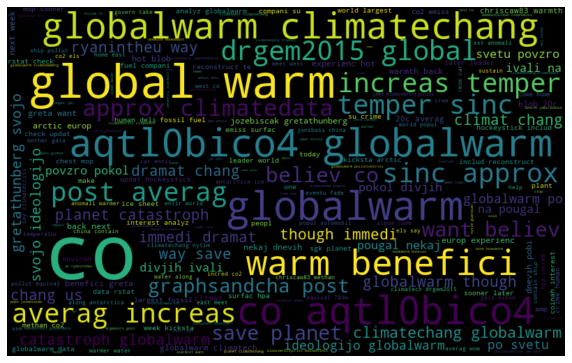

In [ ]:
#Visualization
#Word Cloud
all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
